### Importing required libraries

In [48]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno

import scipy.stats as st
import pylab
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score
from sklearn.model_selection import train_test_split


### Loading data set

In [49]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
#pd.options.display.max_columns=763

In [50]:
df=pd.read_csv("C:\\Users\\rupan\\OneDrive - stu.aud.ac.in\\Desktop\\vehicle_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


#### Viewing top 5 rows of data

In [51]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### checking shape

In [52]:
df.shape

(301, 9)

#### checking info

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### checking the missing values

In [54]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

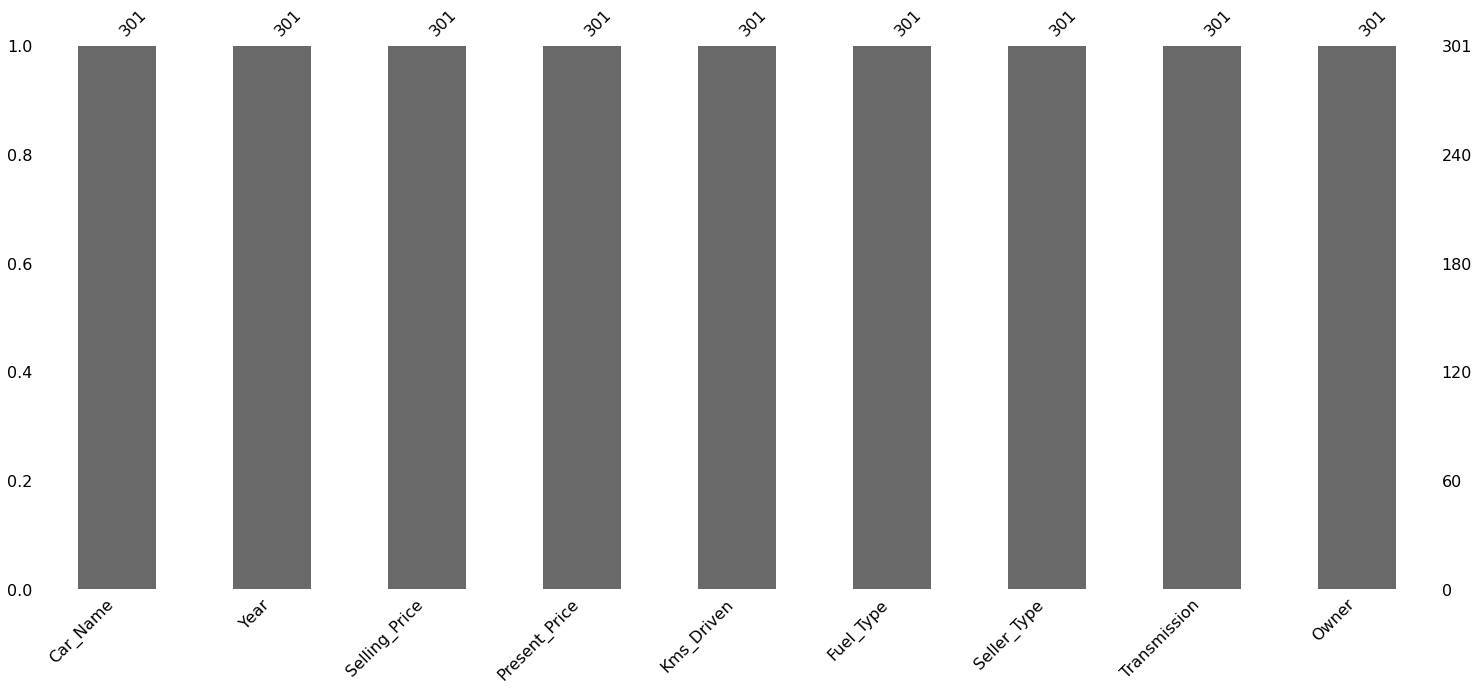

In [55]:
msno.bar(df)

- No missing values

### 1st assumption: Linearing
#### Checking Linearity

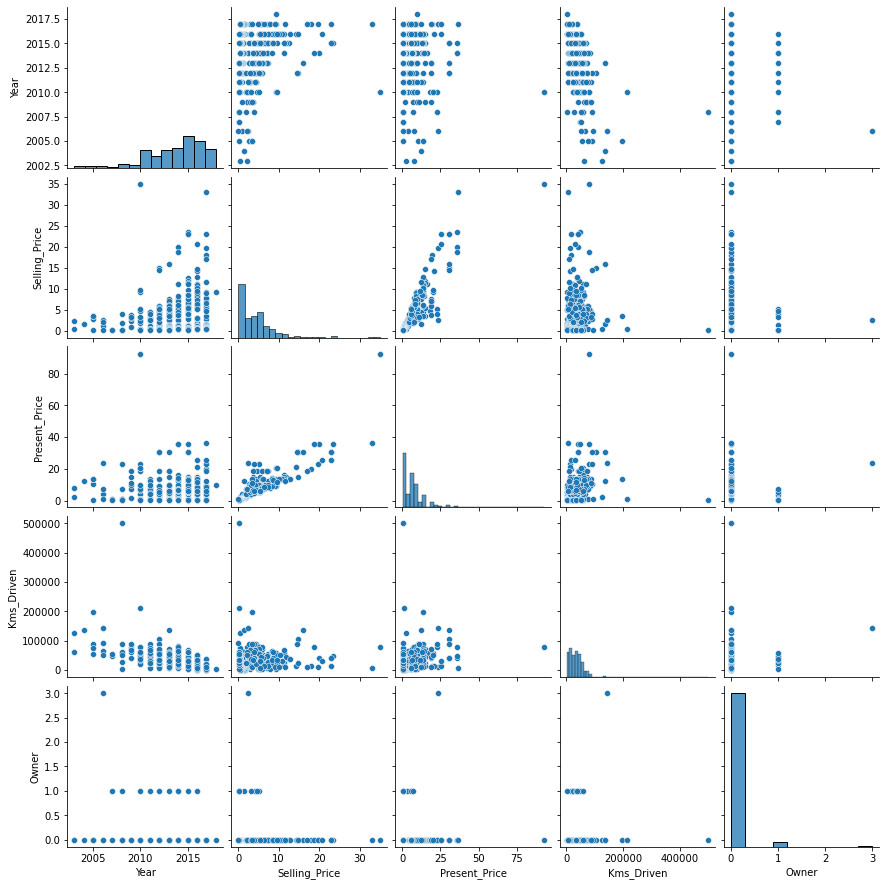

In [56]:
sns.pairplot(df)

### Finding correlation

<AxesSubplot:>

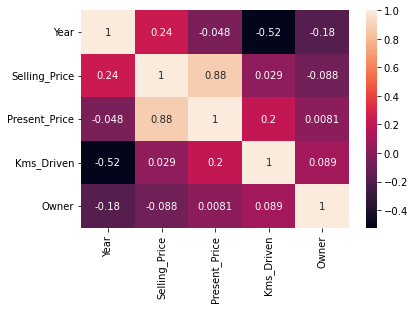

In [57]:
sns.heatmap(df.corr(),annot=True)

#### Distribution

In [58]:
numeric=[int,float]
df_numeric=df.select_dtypes(include=numeric)
df_numeric

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.590,27000,0
1,2013,4.75,9.540,43000,0
2,2017,7.25,9.850,6900,0
3,2011,2.85,4.150,5200,0
4,2014,4.60,6.870,42450,0
5,2018,9.25,9.830,2071,0
6,2015,6.75,8.120,18796,0
7,2015,6.50,8.610,33429,0
8,2016,8.75,8.890,20273,0
9,2015,7.45,8.920,42367,0


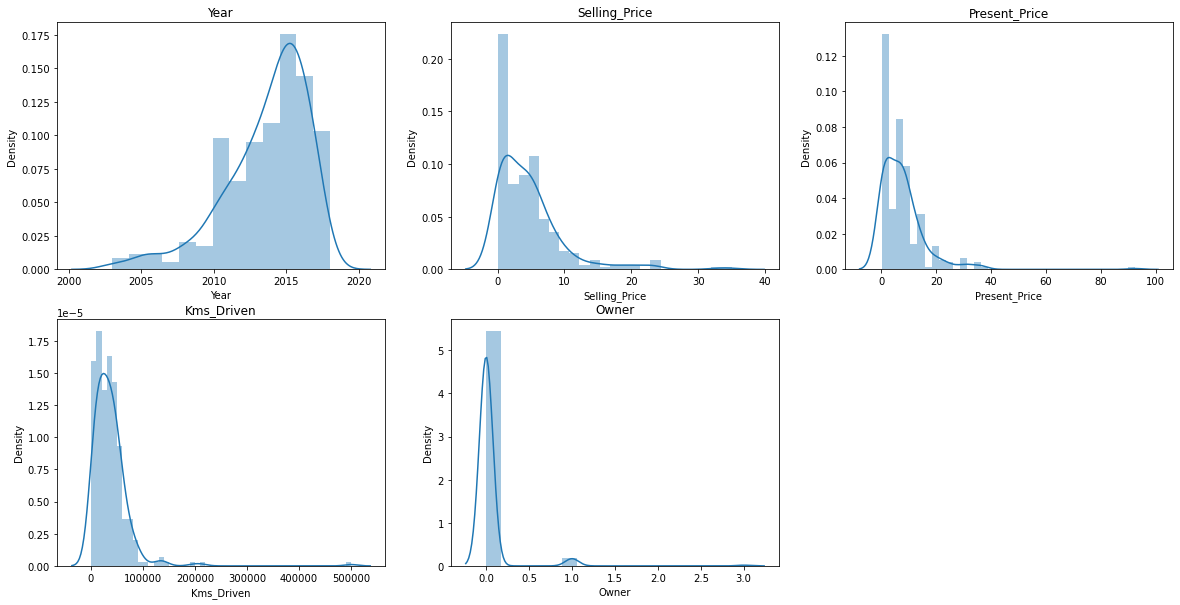

In [59]:
pos=1
plt.figure(figsize=(20,10))
for i in df_numeric.columns:
    plt.subplot(2,3,pos)
    sns.distplot(df_numeric[i])
    plt.title(i)
    pos=pos+1

In [60]:
df_numeric.skew()

Year            -1.246189
Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
dtype: float64

#### checking description

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


### Checking Outliers

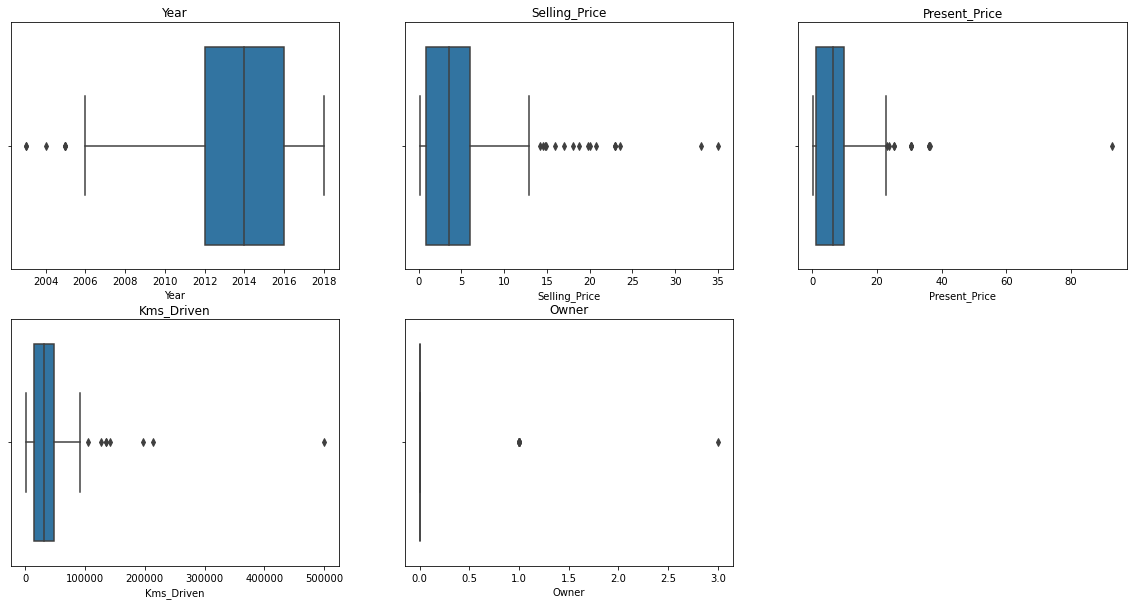

In [62]:
pos=1
plt.figure(figsize=(20,10))
for i in df_numeric.columns:
    plt.subplot(2,3,pos)
    sns.boxplot(df_numeric[i])
    plt.title(i)
    pos=pos+1

- Outliers in all

#### Feature engineering

In [63]:
df["age"]=2023-df["Year"]
df.drop(columns=["Year"],inplace=True) ## too avoid multicoolinearity 

In [64]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [65]:
for i in df.select_dtypes(include="object").columns:
    print(i,"---unique---------",df[i].unique(),"---nunique-----------------------",df[i].nunique())

Car_Name ---unique--------- ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Aven

In [66]:
df1=pd.get_dummies(df,columns=["Fuel_Type","Seller_Type","Transmission"],drop_first=True) ## drop_first=True for dropping one columns to avoid multicoolinearity

In [67]:
df1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,9,0,1,0,1
1,sx4,4.75,9.54,43000,0,10,1,0,0,1
2,ciaz,7.25,9.85,6900,0,6,0,1,0,1
3,wagon r,2.85,4.15,5200,0,12,0,1,0,1
4,swift,4.60,6.87,42450,0,9,1,0,0,1


In [68]:
df1.shape

(301, 10)

#### We will apply mean target encoding to Car name and One hot encoding to fuel type, seller type and transmission

#### We apply mean target encoding since there is so many categories in the car_name columns so we can not use one hot encoding here bcz dimensionality would be increase.

In [69]:
df2=df1.groupby(["Car_Name"])["Selling_Price"].agg(["mean"]).reset_index()

In [70]:
df2

,Car_Name,mean
0,800,0.350000
1,Activa 3g,0.310000
2,Activa 4g,0.400000
3,Bajaj ct 100,0.180000
4,Bajaj Avenger 150,0.750000
5,Bajaj Avenger 150 street,0.600000
6,Bajaj Avenger 220,0.790000
7,Bajaj Avenger 220 dtsi,0.525000
8,Bajaj Avenger Street 220,0.450000
9,Bajaj Discover 100,0.270000


In [71]:
l=[]
for i in df1["Car_Name"]:
    for j,k in df2.iterrows():  ##j index, k info
        if i==k["Car_Name"]:
            l.append(k["mean"])

In [72]:
l

[2.8625,
 3.158333333333333,
 7.472222222222222,
 2.5125,
 4.54,
 9.25,
 7.472222222222222,
 6.5,
 7.472222222222222,
 7.472222222222222,
 2.85,
 7.472222222222222,
 7.472222222222222,
 6.7749999999999995,
 4.475,
 6.7749999999999995,
 6.7749999999999995,
 6.7749999999999995,
 2.5125,
 3.158333333333333,
 2.57,
 4.9,
 3.158333333333333,
 2.57,
 2.5125,
 4.54,
 4.54,
 4.54,
 2.57,
 7.472222222222222,
 2.8625,
 2.8625,
 4.54,
 6.7749999999999995,
 4.475,
 3.158333333333333,
 4.475,
 0.35,
 2.57,
 3.158333333333333,
 5.85,
 2.57,
 3.158333333333333,
 4.475,
 1.25,
 7.472222222222222,
 2.8625,
 2.5125,
 6.7749999999999995,
 7.472222222222222,
 18.685454545454544,
 18.685454545454544,
 12.777777777777779,
 18.685454545454544,
 12.777777777777779,
 7.1831249999999995,
 4.633333333333334,
 7.1831249999999995,
 4.266666666666667,
 18.685454545454544,
 7.1831249999999995,
 4.633333333333334,
 18.685454545454544,
 18.685454545454544,
 18.685454545454544,
 3.7,
 12.777777777777779,
 18.6854545454

In [73]:
df1["Car_Name"]=l

In [74]:
df1

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2.862500,3.35,5.590,27000,0,9,0,1,0,1
1,3.158333,4.75,9.540,43000,0,10,1,0,0,1
2,7.472222,7.25,9.850,6900,0,6,0,1,0,1
3,2.512500,2.85,4.150,5200,0,12,0,1,0,1
4,4.540000,4.60,6.870,42450,0,9,1,0,0,1
5,9.250000,9.25,9.830,2071,0,5,1,0,0,1
6,7.472222,6.75,8.120,18796,0,8,0,1,0,1
7,6.500000,6.50,8.610,33429,0,8,1,0,0,1
8,7.472222,8.75,8.890,20273,0,7,1,0,0,1
9,7.472222,7.45,8.920,42367,0,8,1,0,0,1


#### Seggregate x and y

In [75]:
x=df1.drop(columns=["Selling_Price"])
y=df1["Selling_Price"]

#### Scaling

In [76]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

#### Split the data into train and test with 20% in test data and 80% in training data

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=1)

#### checking the shape of train and test data

In [78]:
x_train.shape

(240, 9)

In [79]:
x_test.shape

(61, 9)

In [80]:
y_train.shape

(240,)

In [81]:
y_test.shape

(61,)

In [82]:
lr=LinearRegression()

In [83]:
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
lr.coef_

array([ 1.40181488,  2.69215621, -0.20729746,  0.09929783, -1.17598968,
        0.49571499, -0.02234284, -0.37628188, -0.59221912])

In [85]:
lr.intercept_

4.6953172944868715

#### Evaluate the model

#### Checking Model Test Accuracy

In [86]:
y_pred=lr.predict(x_test)

In [87]:
r2_score(y_test,y_pred)

0.9035789494878801

- Model test Accuracy-----90% accuracy

#### Checking Model training Accuracy

In [88]:
y_train_pred=lr.predict(x_train)

In [89]:
r2_score(y_train,y_train_pred)

0.8915572561110517

- Model training Accuracy-----89% accuracy

- Overfitting : When train accuracy is higher than the Training accuracy, this is overfitting
- Overfitting situation bcz of the encoding techniques(mean target encoding) i have used. 
- Drawback of using mean target encoding.
### Overfitting bcz of Data leakage(same set of record is used in train as well as in test).

#### How to check the overfitting and underfitting situation

#### Apply Cross Validation

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [91]:
lr=LinearRegression()

In [97]:
### Taking 3 folds
cv= KFold(n_splits=3,random_state=1,shuffle=True)
scores=cross_val_score(lr,x_scaled,y,scoring="r2",cv=cv,n_jobs=-1)
np.mean(scores)

0.8571637607865528

- Now model accuracy is 85 , Balanced Performance